In [9]:
# Experimento simples de uso do Random Forest sem redução de dimensões, mas com padronização dos dados para facilitação do processo de leitura e interpretação dos dados (o baseline foi feito com DummyClassifier)

import pandas as pd

# Leitura do dataset
resultados_exames = pd.read_csv(".\data-set\exames.csv")

# Exibição dos 10 primeiros registros
resultados_exames.head(10)

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
5,843786,M,12.45,15.70,82.57,103.78,477.1,0.12780,0.17000,0.15780,...,103.40,741.6,0.1791,0.5249,0.5355,0.786,0.1741,0.3985,0.12440,0.804347
6,844359,M,18.25,19.98,119.60,103.78,1040.0,0.09463,0.10900,0.11270,...,153.20,1606.0,0.1442,0.2576,0.3784,0.786,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,103.78,577.9,0.11890,0.16450,0.09366,...,110.60,897.0,0.1654,0.3682,0.2678,0.786,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,103.78,519.8,0.12730,0.19320,0.18590,...,106.20,739.3,0.1703,0.5401,0.5390,0.786,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,103.78,475.9,0.11860,0.23960,0.22730,...,97.65,711.4,0.1853,1.0580,1.1050,0.786,0.2210,0.4366,0.20750,NaN


In [10]:
# Exibindo a dimensionalidade do dataframe
resultados_exames.shape

(569, 35)

In [11]:
# Importação das bibliotecas para splits dos datasets
from sklearn.model_selection import train_test_split
from numpy import random

# Criando o SEED para controlar a aleatoriedade
SEED = 1234
random.seed(SEED)

# Separando as colunas de id, diagnóstico e exame_33 do dataset
# id está sendo excluída por não agregar valor ao processo de treinamento
# Á coluna diagnóstico está sendo escluída por ser o target da minha classificação
# A coluna exame_33 está sendo escluída por só conter valores vazios
valores_exames = resultados_exames.drop(columns=['id', 'diagnostico','exame_33', 'exame_4', 'exame_29'])
valores_exames.head(10)

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [12]:
from sklearn.preprocessing import StandardScaler

# Visualmente os dados ainda não estão em um formato que facilite a leitura e a interpretação.
# Vamos padronizar os dados para facilitar esta leitura
padronizador = StandardScaler()

# Treinamos os valores dos exames
padronizador.fit(valores_exames)

# Testamos com os mesmos dados
valores_exames_padronizados = padronizador.transform(valores_exames)
valores_exames_padronizados = pd.DataFrame(data = valores_exames_padronizados, columns=valores_exames.keys())

In [13]:
# Capturando agora só as colunas de id e diagnóstico
diagnostico = resultados_exames.diagnostico
#diagnostico.head(10)

# Segregando os dados em bases de treino e teste e setando o tamanho da base de teste para 30% (o padrão da base de teste é de 25%)
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_padronizados, diagnostico, test_size=0.3)

# treino_x.head()
# teste_x.head()
# treino_y.head()
# teste_y.head()
print("Treino x: " + str(treino_x.shape), " | Teste x: " + str(teste_x.shape), " | Treino y: " + str(treino_y.shape), " | Teste y: " + str(teste_y.shape))

Treino x: (398, 30)  | Teste x: (171, 30)  | Treino y: (398,)  | Teste y: (171,)


In [14]:
# Importação do Random Forest
from sklearn.ensemble import RandomForestClassifier

# Instanciando o Random Forest setando o parâmetro do número de árvores de decisão que serão geradas para 100 (por padrão são geradas 10 árvores) 
classificador = RandomForestClassifier(n_estimators = 100)

# Treinando o modelo com base nos datasets de treino
classificador.fit(treino_x, treino_y)

# Como o Random Forest não aceita valores vazios como entrada, precisamos tratar os valores vazios

# Imprimindo o atributo score do resultado da classificação
print("Resultado da classificação: %.2f%%" %(classificador.score(teste_x,teste_y)*100))

Resultado da classificação: 92.98%


In [15]:
# Precisamos ter um base line para saber se o resultado da nossa classificação é bom ou não. Para isso, iremos criar um novo modelo de classificação utilizando o dummy classifier.
from sklearn.dummy import DummyClassifier

# Criando o fator de aloiretariedade para o novo classificador
SEED = 1234
random.seed(SEED)

# Instanciando o novo classificador com a estratégia most_frequent: a predição sempre retorna o rótulo de classe mais frequente no argumento y observado passado para fit.
# O método predict_proba retorna o vetor codificado one-hot correspondente. Basicamente ele chuta o valor mais comum para y.
classificador_bobo = DummyClassifier(strategy= "most_frequent")

# Treinando o novo modelo 
classificador_bobo.fit(treino_x, treino_y)

resultado_classificador_bobo = round((classificador_bobo.score(teste_x, teste_y)*100),2)
resultado_classificador_rf = round((classificador.score(teste_x, teste_y)*100),2)
# Imprimindo o atributo score do novo resultado da classificação
print("Resultado da classificação boba: " + str(resultado_classificador_bobo) + "%")
print("Resultado da classificação com Random Forest: " + str(resultado_classificador_rf)+ "%")

# Comparando nosso resultado utilizando o Random Forest com o classificador bobo, podemos deduzir que o resultado do RF é muito bom e que nossa classificação está correta.
# Com a padronização, tivemos uma melhora de quase 1% no resultado da classificação
print("Diferença de : " + str(round((resultado_classificador_rf - resultado_classificador_bobo),2))+ "%")

Resultado da classificação boba: 61.4%
Resultado da classificação com Random Forest: 92.98%
Diferença de : 31.58%


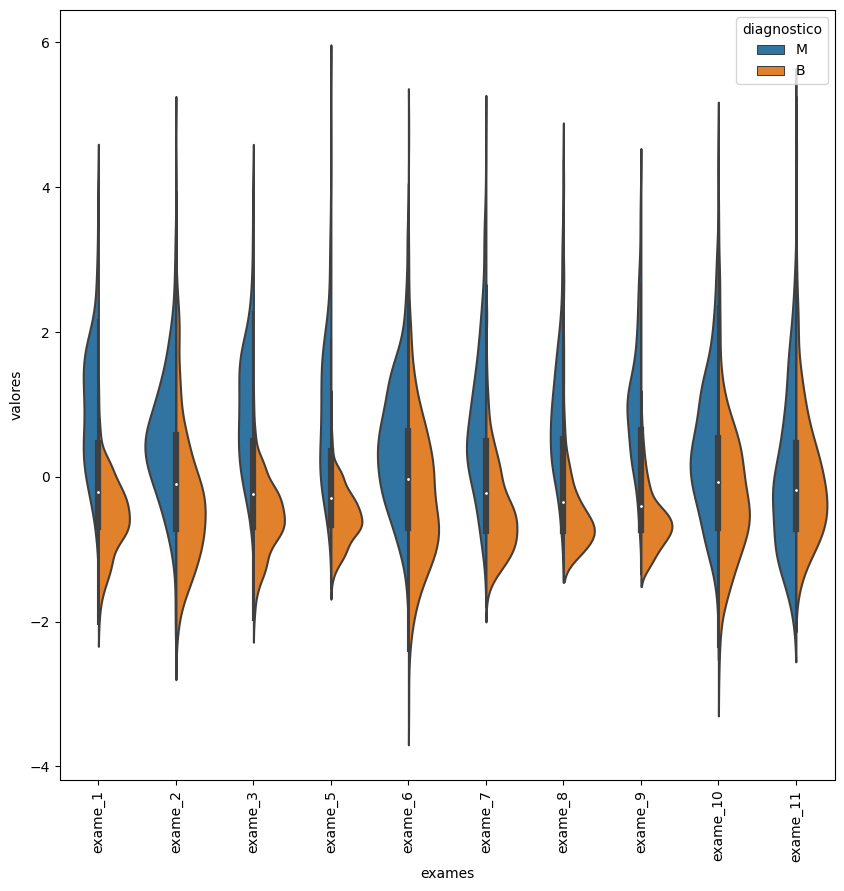

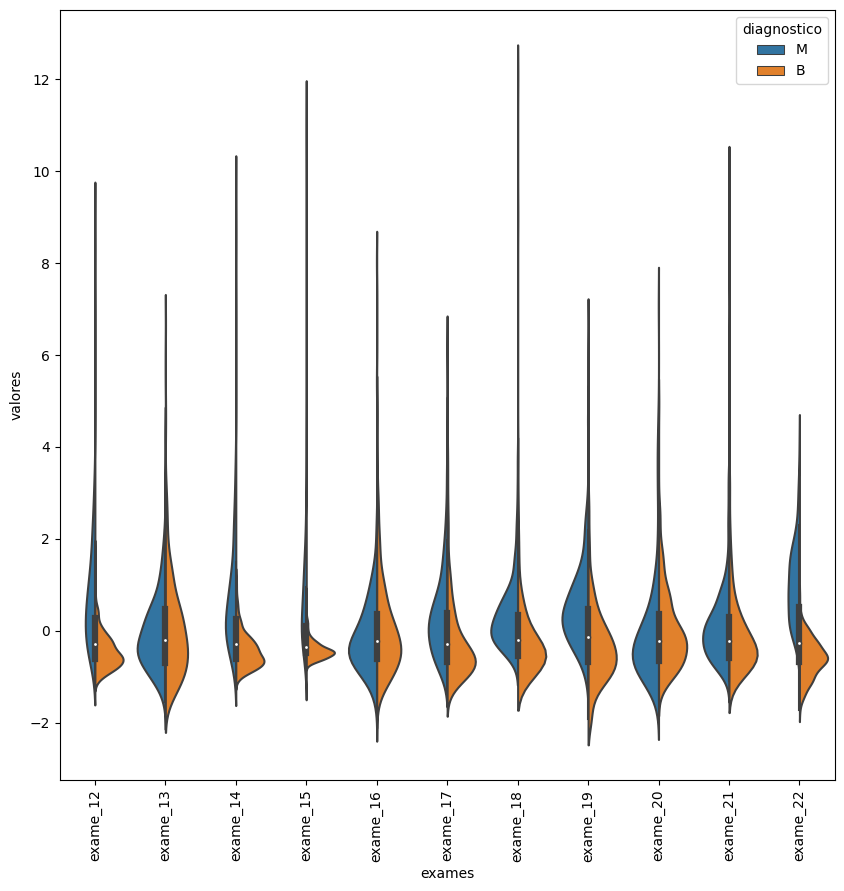

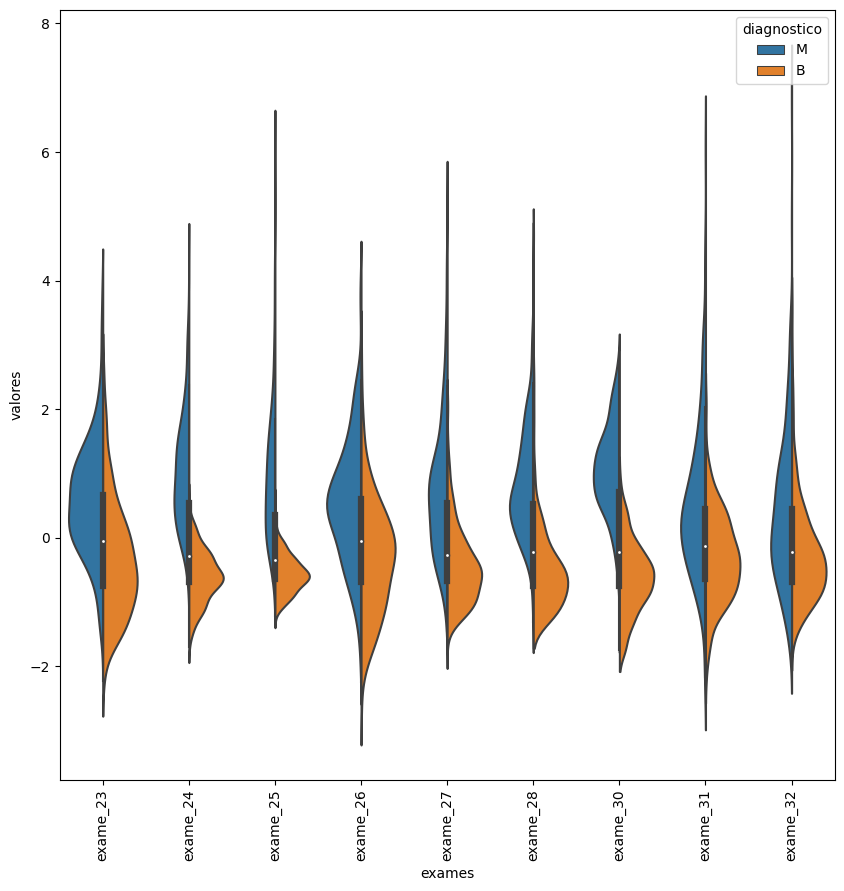

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vamos criar uma função para gerar a visualização dos nossos dados que realizaremos a análise
def grafico_violino(valores, inicio, fim):
    # Vamo começar a preparar os dataframes para realizarmos uma redução dimensional, para isso precisamos de um dataframe que tenha as colunas de exame e de diagnóstico 
    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]],axis = 1)

    # Agora usamos a função melt do pandas para realizar a redução dimensional, onde os parâmetros são:
    # id_vars="diagnostico" Coluna(s) a serem usadas como variáveis ​​identificadoras.
    # var_name="exames" Nome a ser usado para a coluna 'variável'. Se Nenhum, ele usa frame.columns.nameou 'variável'
    # value_name='valores' Nome a ser usado para a coluna 'valor'
    dados_plot = pd.melt(dados_plot, id_vars="diagnostico",var_name="exames",value_name='valores')

    # Criando agora a visualização
    plt.figure(figsize=(10, 10))

    # Gerando a visualização da distribuição dos exames, valores e diagnósticos
    sns.violinplot(x = "exames", y = "valores", hue = "diagnostico",data = dados_plot, split = True)
    plt.xticks(rotation = 90)

grafico_violino(valores_exames_padronizados, 0, 10)
grafico_violino(valores_exames_padronizados, 10, 21)
grafico_violino(valores_exames_padronizados, 21, 32)

# Com essa análise podemos observar que existem constantes nas colunas exame_4 e exame_29 